<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/BitCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Our learning path is structured as follows:**

**Part 1: The Building Blocks of Time Series Analysis**
*   ✅ What is a Time Series?
*   ✅ Key Components: Trend, Seasonality, Cycles, and Noise
*   ✅ Data Preparation: Handling missing values and outliers
*   ✅ Smoothing with Moving Averages
*   ✅ Decomposing the series to see its parts
*   ✅ Establishing a Baseline: Simple Forecasting Models

**Part 2: Advanced Forecasting Techniques**
*   ✅ Smoothing Methods (SES, Holt, Holt-Winters)
*   ✅ The Concept of Stationarity and the ADF Test
*   ✅ Making a series stationary with Differencing
*   ✅ Uncovering patterns with ACF and PACF plots
*   ✅ Correlation vs. Causation: A quick but important note
*   ✅ Building our masterpiece: AR, MA, ARMA, and ARIMA models

### What is a Time Series?

In simple terms, a **Time Series** is a sequence of data points collected over time. Think of it as a storybook where each page is a moment in time, and the words on the page are the data we've recorded. This could be anything from the daily closing price of a stock, monthly sales of a supermarket, to the hourly temperature of a city.

**Business Analogy:** Imagine you own a small ice cream shop. Every day, you track how many scoops of chocolate ice cream you sell. This daily record of sales is a time series. By analyzing it, you can discover patterns, like selling more ice cream on weekends or during summer, which helps in managing your inventory and staff.

In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14,7)

In [13]:
file_path = '/content/Bitcoin_history_data.csv'

df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
btc_price = df[['Close']].rename(columns={'Close':'Price'})

print("First 5 rows of the dataset:")
print(btc_price.head())

print("\nLast 5 rows of the dataset:")
print(btc_price.tail())

print("\n NUmber of missing values:")
print(btc_price.isnull().sum())

First 5 rows of the dataset:
                 Price
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014

Last 5 rows of the dataset:
                    Price
Date                     
2025-07-27  119448.492188
2025-07-28  117924.476562
2025-07-29  117922.148438
2025-07-30  117831.187500
2025-07-31  115758.203125

 NUmber of missing values:
Price    0
dtype: int64


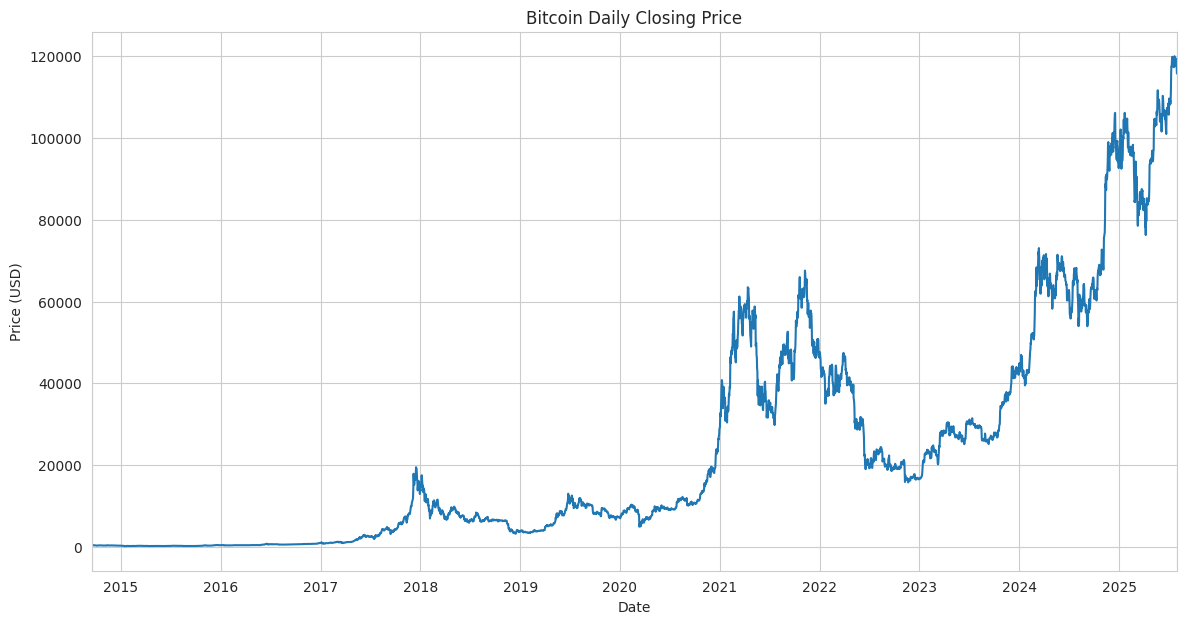

In [14]:
import matplotlib.pyplot as plt
btc_price.plot(title="Bitcoin Daily Closing Price", legend=False)
# Add labels for clarity.
plt.ylabel('Price (USD)')
plt.xlabel('Date')

# Display the plot.
plt.show()

### Key Components of a Time Series

Every time series can be broken down into four main components:

1.  **Trend (T)**: The long-term direction of the data. Is it generally increasing, decreasing, or staying constant?
    *   *Analogy*: For our ice cream shop, the trend might be an increase in sales over several years as the shop becomes more popular.

2.  **Seasonality (S)**: A repeating, predictable pattern over a fixed period. This could be daily, weekly, or yearly.
    *   *Analogy*: Ice cream sales are always higher in the summer and lower in the winter. This predictable, yearly pattern is seasonality.

3.  **Cycle (C)**: A long-term, wave-like pattern that is not of a fixed period. These are often related to broader economic or business cycles.
    *   *Analogy*: Over several years, the local economy might go through booms and busts. During a boom, more people have disposable income and buy more ice cream. This is a cycle, not a fixed seasonal pattern.

4.  **Noise / Irregularity (I)**: The random, unpredictable variations in the data that are not explained by the other components. It's the leftover "static."
    *   *Analogy*: A sudden, one-day heatwave in October causes a spike in sales. This is a random, unpredictable event and is considered noise.

These components can be combined in two ways:
*   **Additive Model**: `Y(t) = T(t) + S(t) + C(t) + I(t)` (Components are added together)
*   **Multiplicative Model**: `Y(t) = T(t) * S(t) * C(t) * I(t)` (Components are multiplied)

We often use a multiplicative model when the magnitude of the seasonal pattern or variation increases with the level of the series.

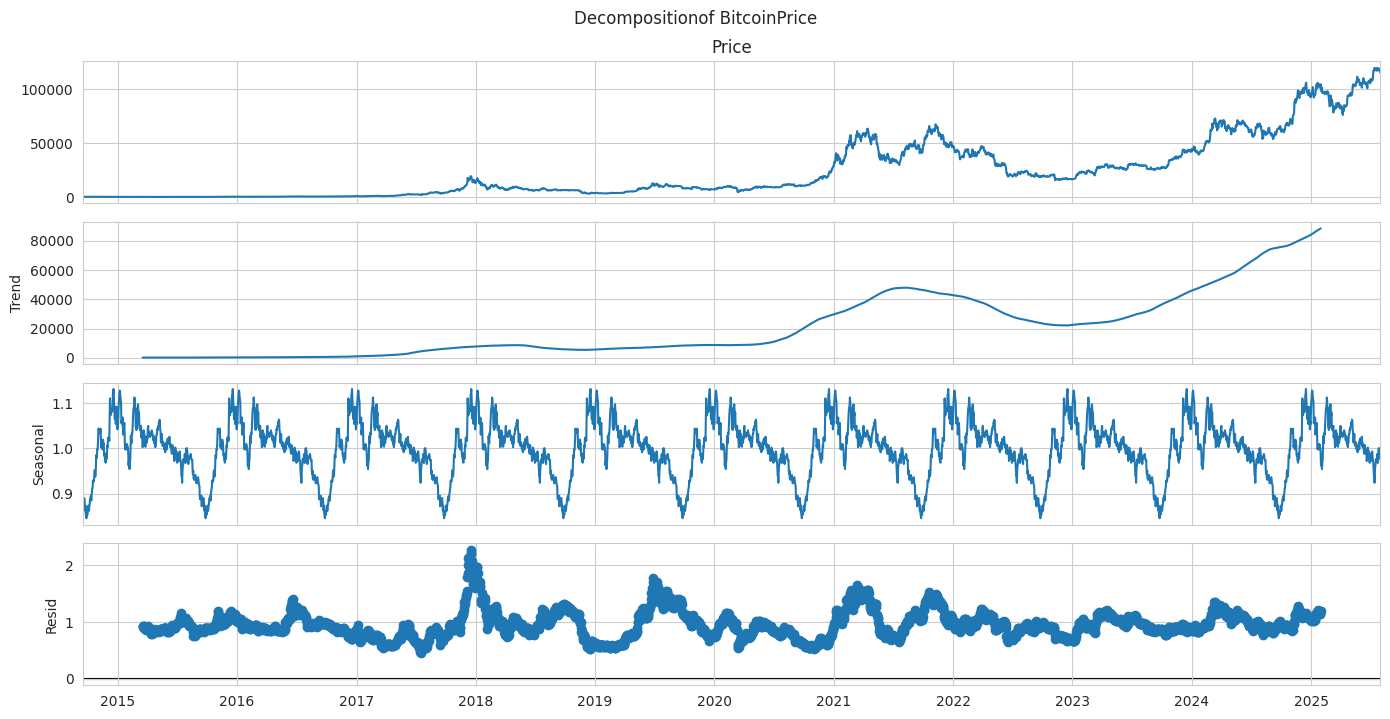

In [15]:
decomposition = seasonal_decompose(btc_price['Price'], model='multiplicative', period=365)

fig = decomposition.plot()
fig.suptitle('Decompositionof BitcoinPrice', y=1.02)
plt.show()

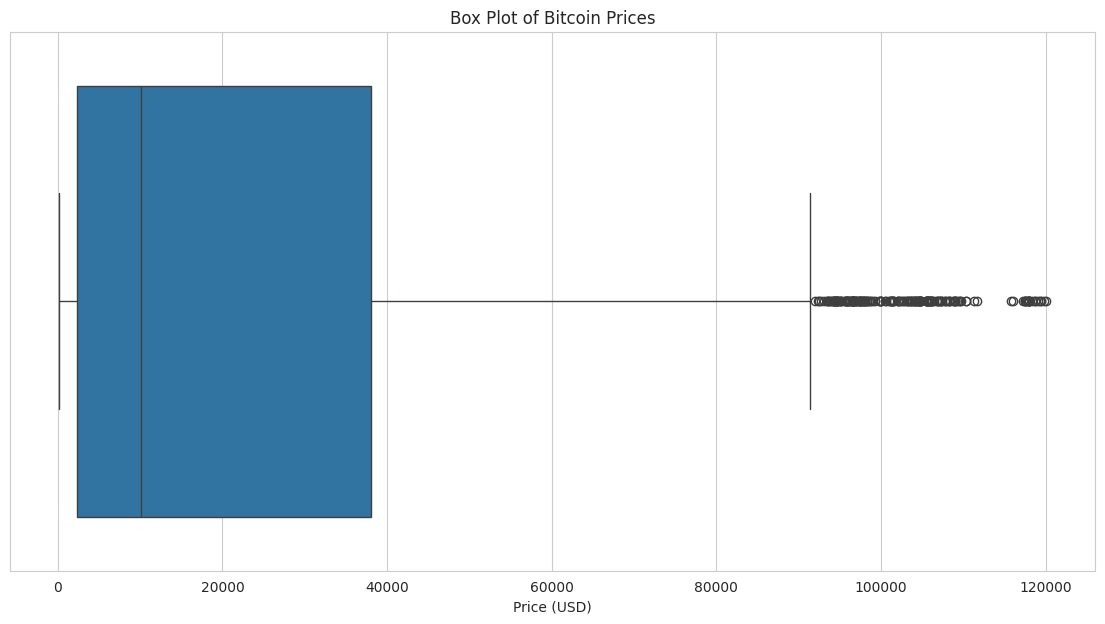

In [16]:
sns.boxplot(x=btc_price['Price'])
plt.title('Box Plot of Bitcoin Prices')
plt.xlabel('Price (USD)')
plt.show()

### Smoothing with Moving Averages

A moving average is a technique used to smooth out short-term fluctuations and highlight longer-term trends. It works by creating a series of averages of different subsets of the full data.

**Simple Numeric Example:**
Imagine our daily ice cream sales for a week are: `[10, 12, 11, 15, 18, 20, 19]`.
A 3-day moving average would be calculated as:
*   Day 3: `(10 + 12 + 11) / 3 = 11.0`
*   Day 4: `(12 + 11 + 15) / 3 = 12.67`
*   Day 5: `(11 + 15 + 18) / 3 = 14.67`
...and so on.

Let's calculate and plot 30-day and 90-day moving averages for our Bitcoin data.

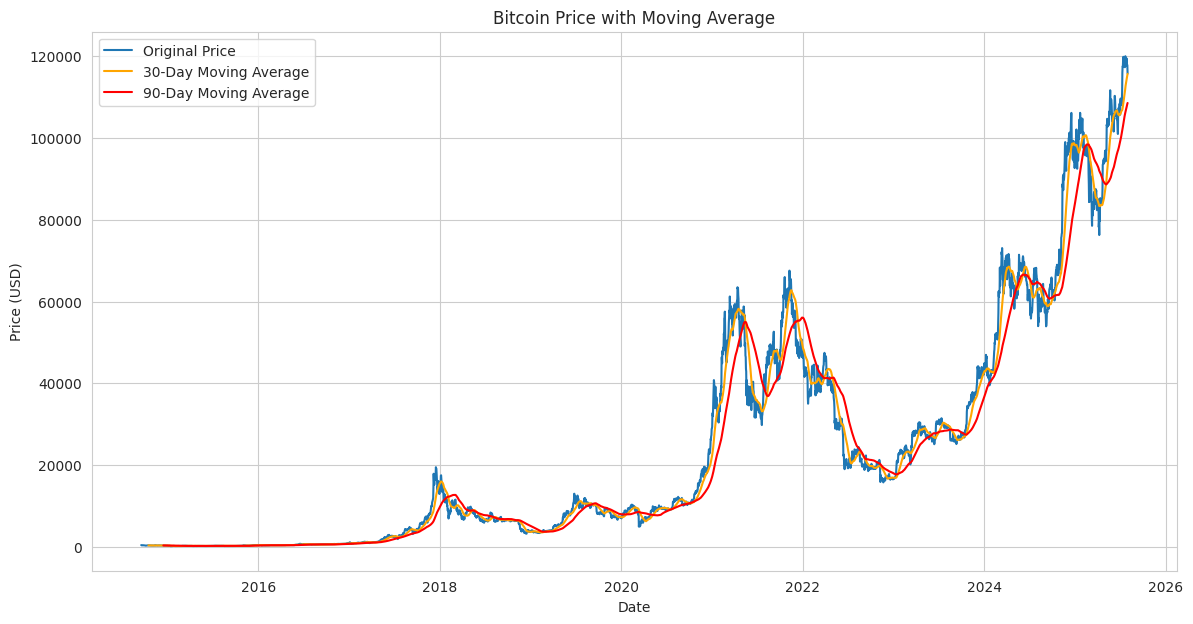

In [17]:
btc_price['MA30'] = btc_price['Price'].rolling(window=30).mean()
btc_price['MA90'] = btc_price['Price'].rolling(window=90).mean()

plt.plot(btc_price['Price'], label="Original Price")
plt.plot(btc_price['MA30'], label="30-Day Moving Average", color='Orange')
plt.plot(btc_price['MA90'], label="90-Day Moving Average", color='red')

plt.title('Bitcoin Price with Moving Average')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [18]:
train_data = btc_price.iloc[:-365]
test_data = btc_price.iloc[-365:]
print(f"Training data shape:{train_data.shape}")
print(f"Test data shape:{test_data.shape}")

Training data shape:(3606, 3)
Test data shape:(365, 3)


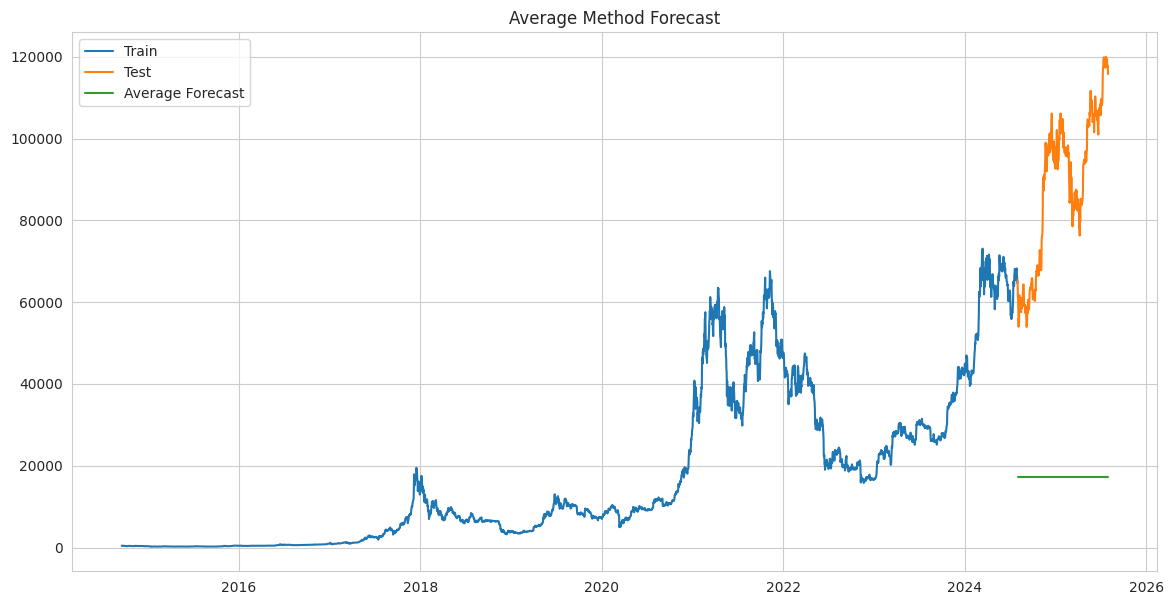

Average Method RMSE: 73528.78


In [19]:
#calculate avg training data price
y_hat_avg = test_data.copy()
y_hat_avg['forecast'] = train_data['Price'].mean()

plt.plot(train_data['Price'], label='Train')
plt.plot(test_data['Price'], label='Test')
plt.plot(y_hat_avg['forecast'], label='Average Forecast')
plt.title('Average Method Forecast')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test_data['Price'], y_hat_avg['forecast']))
print(f"Average Method RMSE: {rmse:.2f}")

#### 2. Naïve Method
The forecast for tomorrow is simply the value from today.

*   *Formula*: `Forecast(t+1) = Value(t)`
*   *Analogy*: If we sold 60 ice creams today, we predict we'll sell 60 tomorrow.

/tmp/ipython-input-702421860.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_navie['forecast']= train_data['Price'][-1]


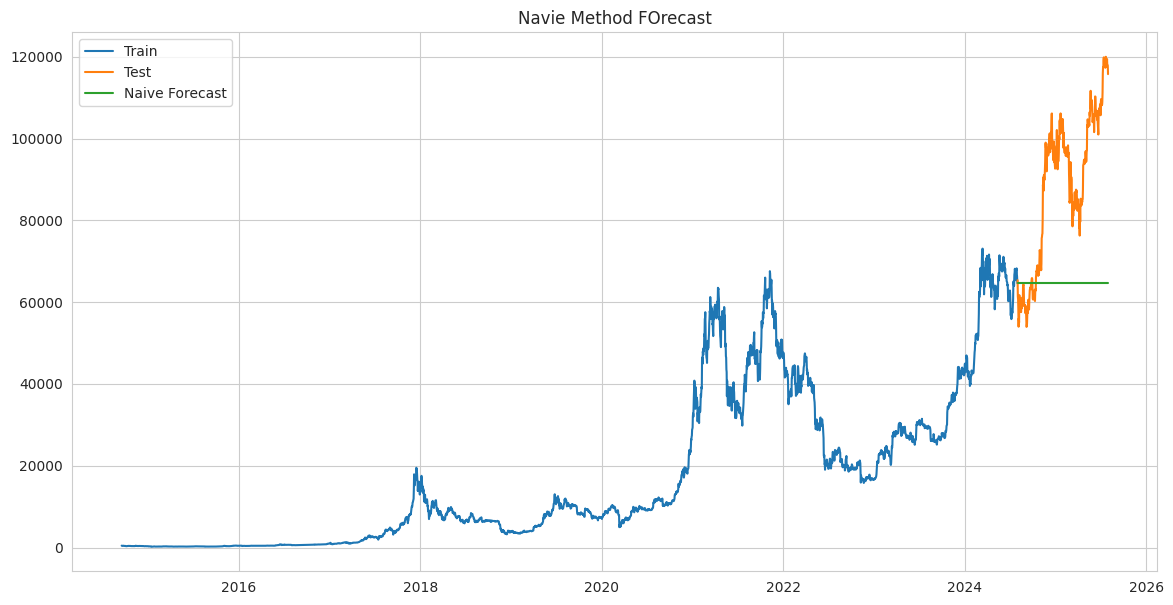

Navie Method RMSE: 30037.42


In [20]:
y_hat_navie = test_data.copy()
y_hat_navie['forecast']= train_data['Price'][-1]

plt.plot(train_data['Price'], label='Train')
plt.plot(test_data['Price'], label='Test')
plt.plot(y_hat_navie['forecast'], label='Naive Forecast')
plt.title("Navie Method FOrecast")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test_data['Price'], y_hat_navie['forecast']))
print(f"Navie Method RMSE: {rmse:.2f}")

#### 3. Seasonal Naïve Method
The forecast for a future period is the value from the same period in the last season.

*   *Formula*: `Forecast(t) = Value(t - season_length)`
*   *Analogy*: To predict this Saturday's ice cream sales, we look at last Saturday's sales.

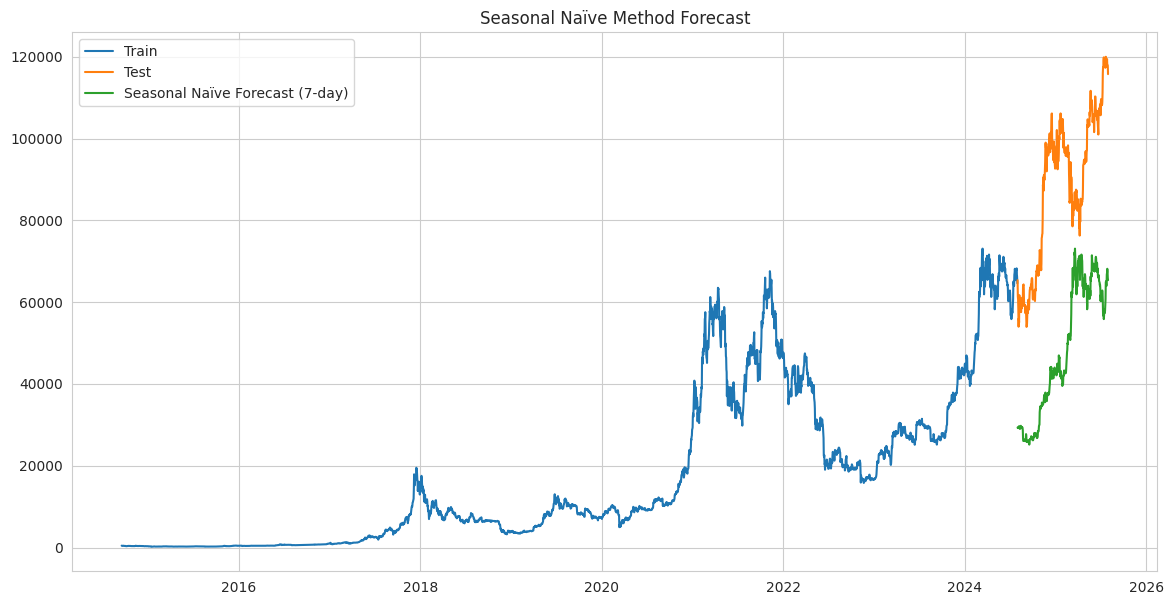

Seasonal Naïve (7-day) Method RMSE: 42843.86


In [22]:
# We'll use a weekly seasonality (7 days) for this example as it's common in daily data.
# The forecast is the value from 7 days ago in the training data.
y_hat_seasonal_naive = test_data.copy()
# Create the forecast by shifting the training data by the length of the test data minus 7
y_hat_seasonal_naive['forecast'] = train_data['Price'][-(len(test_data)+7):-7].values

plt.plot(train_data['Price'], label='Train')
plt.plot(test_data['Price'], label='Test')
plt.plot(y_hat_seasonal_naive['forecast'], label='Seasonal Naïve Forecast (7-day)')
plt.title('Seasonal Naïve Method Forecast')
plt.legend()
plt.show()

# Calculate and print the RMSE.
rmse = np.sqrt(mean_squared_error(test_data['Price'], y_hat_seasonal_naive['forecast']))
print(f"Seasonal Naïve (7-day) Method RMSE: {rmse:.2f}")

#### 4. Drift Method
This is a variation of the naïve method that accounts for a trend. It draws a line between the first and last historical points and extends it into the future.

*   *Formula*: `Forecast(t+h) = Value(last) + h * ( (Value(last) - Value(first)) / (number_of_points - 1) )`
*   *Analogy*: Our ice cream shop sold 20 scoops on its first day and 100 on its last day, a year later. We calculate the average daily increase and add that for each future day's forecast.

/tmp/ipython-input-93510235.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  drift = (train_data['Price'][-1] - train_data['Price'][0]) / (len(train_data) - 1)
/tmp/ipython-input-93510235.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts.append(train_data['Price'][-1] + i * drift)


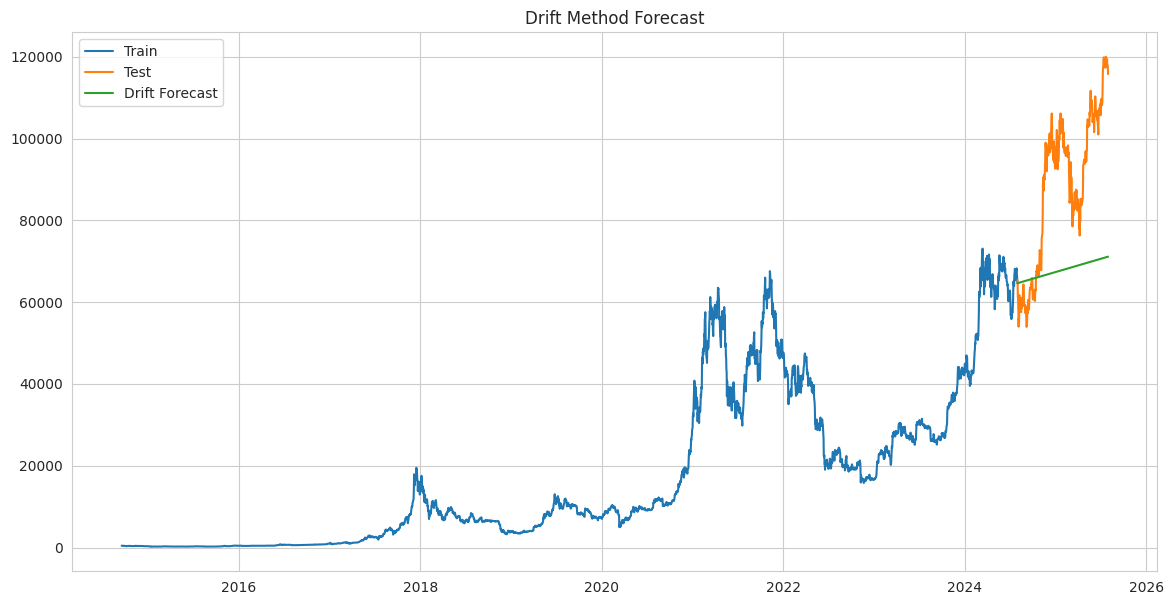

Drift Method RMSE: 26527.78


In [23]:
# Calculate the drift (average change per time step).
drift = (train_data['Price'][-1] - train_data['Price'][0]) / (len(train_data) - 1)

# Create the forecast.
y_hat_drift = test_data.copy()
forecasts = []
for i in range(1, len(test_data) + 1):
    forecasts.append(train_data['Price'][-1] + i * drift)
y_hat_drift['forecast'] = forecasts

# Plot the forecast.
plt.plot(train_data['Price'], label='Train')
plt.plot(test_data['Price'], label='Test')
plt.plot(y_hat_drift['forecast'], label='Drift Forecast')
plt.title('Drift Method Forecast')
plt.legend()
plt.show()

# Calculate and print the RMSE.
rmse = np.sqrt(mean_squared_error(test_data['Price'], y_hat_drift['forecast']))
print(f"Drift Method RMSE: {rmse:.2f}")